**5. [0-7 points] The Wisconsin Breast Cancer dataset http://bit.ly/2xAuP5t includes data of 569 breast cancer patients. In detail, first column is PatientID, second column is the Diagnosis (Malignant/Begnin), while the remaining column 3-32 consists of 3 groups of 10 histological descriptors of tumoral cells; for each descriptor, its Average, StandardError and Worst Case are listed. Using the 30 descriptor columns, project using t-SNE the 569 patients on a 2D space and color them according to their diagnosis. Are the two different diagnoses well separated in the 2D space?**

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = pd.read_csv("WisconsinBreastCancer.csv")
df

,patient ID,patient diagnosis,Average radius,Average texture,Average perimeter,Average area,Average smoothness,Average compactness,Average concavity,Average concave points,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
x = df[df.columns.difference((['patient diagnosis']))]
y = df.iloc[: , 1].values

unique, counts = np.unique(y, return_counts=True)

classes = len(counts)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
tsne = TSNE(n_components=classes, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.539819
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.978378
[t-SNE] KL divergence after 300 iterations: 0.950518


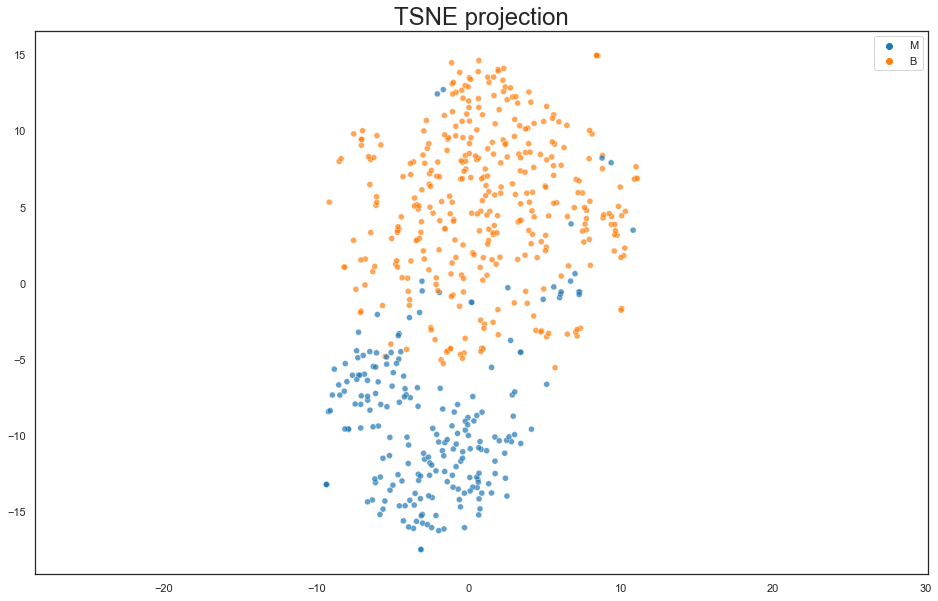

In [10]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x = tsne_results[:, 0],
                y = tsne_results[:, 1],
                hue = y,
                palette = sns.color_palette('tab10', classes),
                legend = 'full',
                alpha = 0.7)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(bbox_to_anchor = (1, 1))
plt.title('TSNE projection', fontsize=24)
plt.show()

**Repeat the same procedure using only the last 10 Worst Case columns: is the separation between diagnoses improving or worsening?**

In [11]:
# define x 
x = df.iloc[: , 11:]
# define target variable: select last column
y = df.iloc[: , 1].values
unique, counts = np.unique(y, return_counts=True)
classes = len(counts)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
tsne = TSNE(n_components=classes, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.252632
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.934189
[t-SNE] KL divergence after 300 iterations: 0.954786


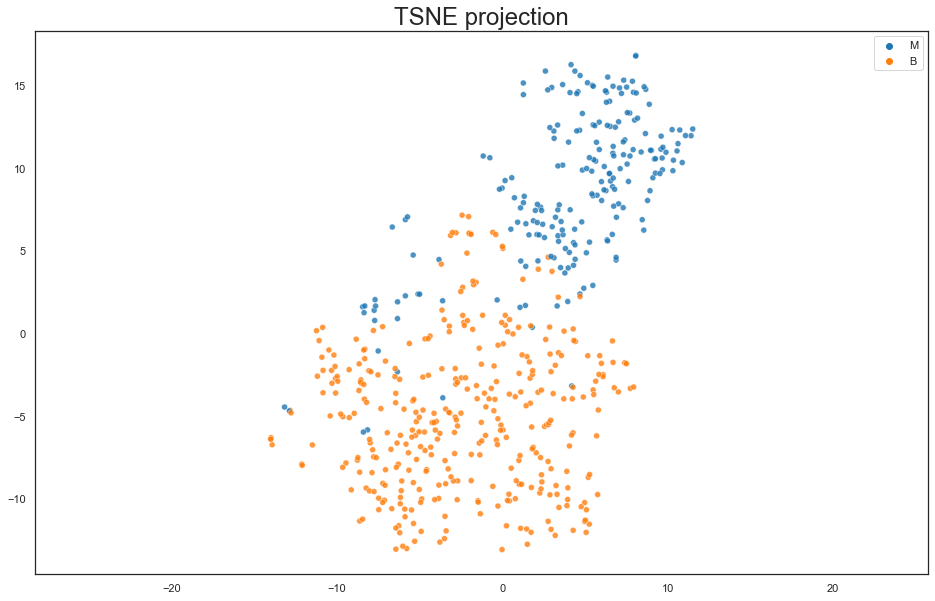

In [15]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x = tsne_results[:, 0],
                y = tsne_results[:, 1],
                hue = y,
                palette = sns.color_palette('tab10', classes),
                legend = 'full',
                alpha = 0.8)

plt.gca().set_aspect('equal', 'datalim')
plt.legend(bbox_to_anchor = (1, 1))
plt.title('TSNE projection', fontsize=24)
plt.show()